In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


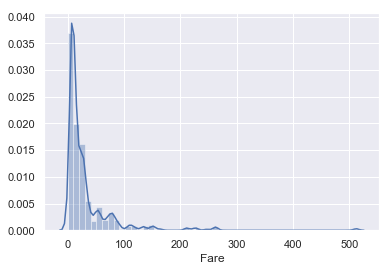

In [24]:
sns.distplot(df['Fare'])

Fare is not distributed normally - possibly need to handle 

Text(0.5, 1.0, 'Fares in 1st class')

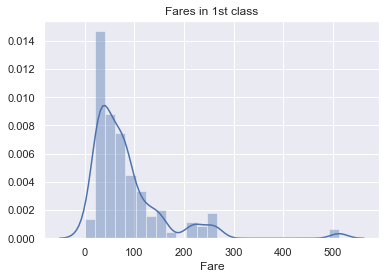

In [7]:
sns.distplot(df[df['Pclass'] == 1]['Fare']).set_title('Fares in 1st class')

All values (see also below) above 70-80 are 1st class, so all outliers are in class 1

In [11]:
df[df['Pclass'] == 1]['Fare'].describe()

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64

In [22]:
for fare in [93, 100, 200, 210, 220, 240, 250, 260, 270, 300, 400, 500]:
    print(f'Number of passengers with fare > {fare}: {df[df["Fare"] > fare]["Fare"].count()}')

Number of passengers with fare > 93: 55
Number of passengers with fare > 100: 53
Number of passengers with fare > 200: 20
Number of passengers with fare > 210: 20
Number of passengers with fare > 220: 16
Number of passengers with fare > 240: 11
Number of passengers with fare > 250: 9
Number of passengers with fare > 260: 9
Number of passengers with fare > 270: 3
Number of passengers with fare > 300: 3
Number of passengers with fare > 400: 3
Number of passengers with fare > 500: 3


Based on number of passengers with far > 270, we might be able to disregard them (delete them)

Text(0.5, 1.0, 'Chance to survive per Pclass')

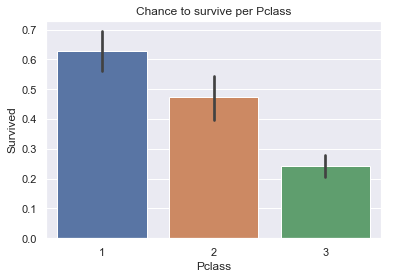

In [35]:
sns.barplot(data=df, x='Pclass', y='Survived').set_title('Chance to survive per Pclass')

Chance to survive has a high correlation to class

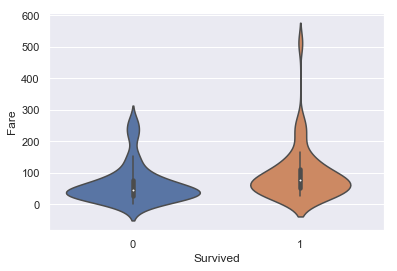

In [40]:
sns.violinplot(data=df[df['Pclass']==1], y='Fare', x='Survived') 

According to this data, everyone who paid > 300 survived (but that's only 3), but if we disregard the fares > 300, violins of survived / not survived for Pclass 1 look pretty similar, although it seems that from those that survived, the fair paid is slightly higher 80-90, while in not survived 60-70, so fare does help to predict if someone survived in class 1

Text(0.5, 1.0, 'Fares in 2nd class')

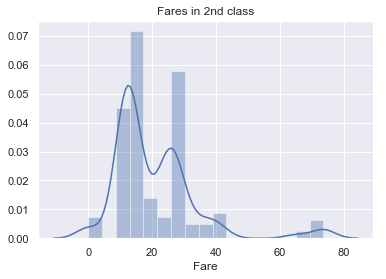

In [8]:
sns.distplot(df[df['Pclass'] == 2]['Fare']).set_title('Fares in 2nd class')

Text(0.5, 1.0, 'Fares in 3rd class')

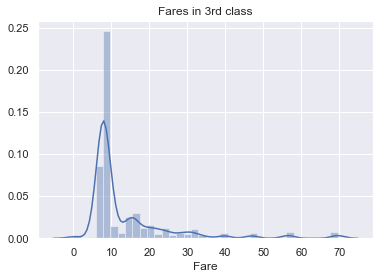

In [9]:
sns.distplot(df[df['Pclass'] == 3]['Fare']).set_title('Fares in 3rd class')

Conclusions:
- Consider removing everything > 300 / replacing with some value
- Also consider removing everything > 200 / replacing with some value

Text(0.5, 1.0, 'Fare Violin for 2nd class')

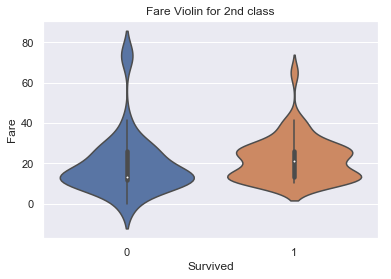

In [44]:
sns.violinplot(data=df[df['Pclass']==2], y='Fare', x='Survived').set_title('Fare Violin for 2nd class')

Seems that fare also helps in class 2 slightly to predict survival, but much less than in 1st class (difference of 15 vs. 20)

Text(0.5, 1.0, 'Fare Violin for 3rd class')

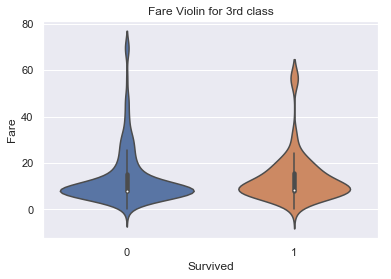

In [43]:
sns.violinplot(data=df[df['Pclass']==3], y='Fare', x='Survived').set_title('Fare Violin for 3rd class')

Seems that in 3rd class there is no difference in fare and survival rate

Text(0.5, 1.0, 'Change of survival 1st class excuding fare > 300')

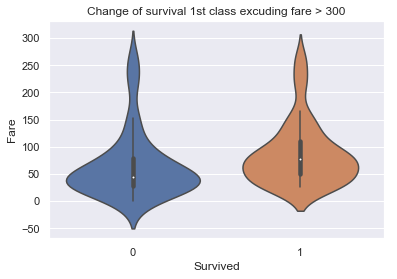

In [46]:
sns.violinplot(data=df[(df['Pclass']==1) & (df['Fare']<300)], y='Fare', x='Survived').set_title('Change of survival 1st class excuding fare > 300')

Text(0.5, 1.0, 'Change of survival 1st class excuding fare > 200')

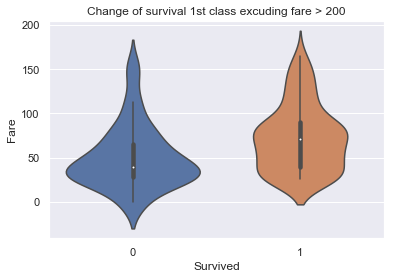

In [47]:
sns.violinplot(data=df[(df['Pclass']==1) & (df['Fare']<200)], y='Fare', x='Survived').set_title('Change of survival 1st class excuding fare > 200')

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


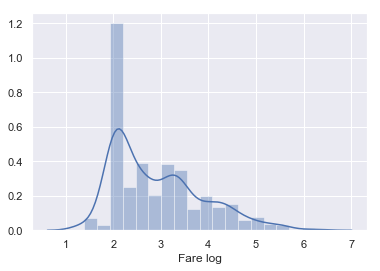

In [88]:
df['Fare log'] = np.log(df['Fare'])
min_value = df[df['Fare log'] != np.NINF]['Fare log'].min()
df['Fare log'].replace({np.NINF: min_value}, inplace=True)
sns.distplot(df['Fare log'])

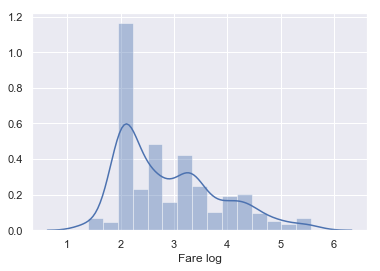

In [89]:
sns.distplot(df[df['Fare log'] < df['Fare log'].max()]['Fare log'])

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


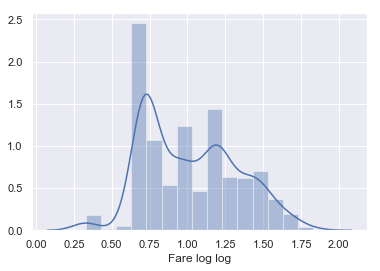

In [90]:
df['Fare log'] = np.log(df['Fare'])
min_value = df[df['Fare log'] != np.NINF]['Fare log'].min()
df['Fare log'].replace({np.NINF: min_value}, inplace=True)
df['Fare log log'] = np.log(df['Fare log'])
sns.distplot(df['Fare log log'])

Text(0.5, 1.0, 'Change of survival 1st class based on log log')

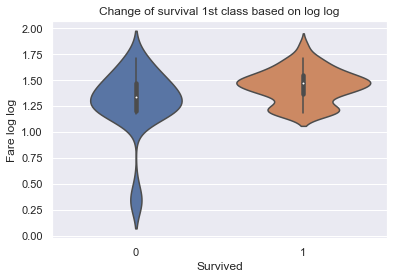

In [92]:
sns.violinplot(data=df[df['Pclass']==1], y='Fare log log', x='Survived').set_title('Change of survival 1st class based on log log')

Text(0.5, 1.0, 'Change of survival 1st class excuding fare > 300, based on log log')

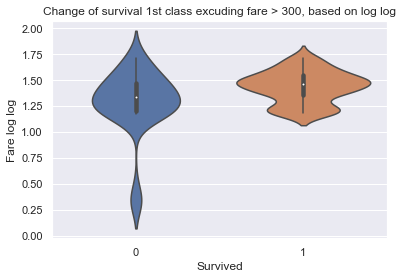

In [91]:
sns.violinplot(data=df[(df['Pclass']==1) & (df['Fare']<300)], y='Fare log log', x='Survived').set_title('Change of survival 1st class excuding fare > 300, based on log log')

Text(0.5, 1.0, 'Change of survival 1st class based on log')

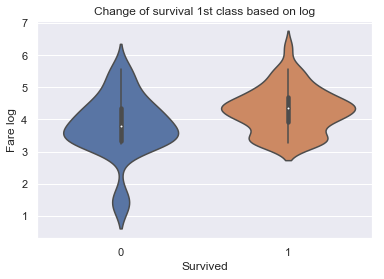

In [93]:
sns.violinplot(data=df[df['Pclass']==1], y='Fare log', x='Survived').set_title('Change of survival 1st class based on log')

Text(0.5, 1.0, 'Change of survival 1st class excuding fare > 300, based on log')

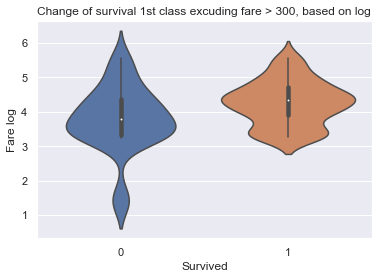

In [94]:
sns.violinplot(data=df[(df['Pclass']==1) & (df['Fare']<300)], y='Fare log', x='Survived').set_title('Change of survival 1st class excuding fare > 300, based on log')

Seems that **log** is helpful, **log log** is overkill, also once using log, no need so much to remove the outliers

In [100]:
df['Fare'].quantile(.99)

249.00622000000033

In [101]:
df['Fare'].quantile(.98)

211.33750000000003

In [102]:
df['Fare'].quantile(.97)

151.55

In [103]:
df['Fare'].quantile(.985)

227.52500000000003